In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [53]:
df = pd.read_csv('/content/drive/My Drive/courses/data analytics basics/datasets/Position_Salaries.csv')

In [54]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


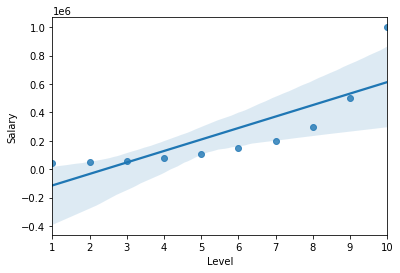

In [55]:
sns.regplot(x='Level', y='Salary',data=df)
plt.show()

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
pf = PolynomialFeatures(degree=3)
X = pf.fit_transform(df[['Level']])
X

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg = LinearRegression()
reg.fit(X, df['Salary'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
ypred= reg.predict(X)

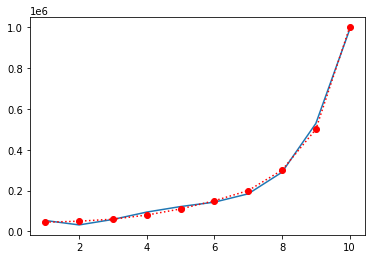

In [33]:
plt.plot(df['Level'],ypred)
plt.plot(df['Level'],df['Salary'],'r:o')

In [28]:
v = 12
inp = pf.transform(np.array([[v]]))

In [ ]:
reg.predict(inp)

array([3035984.84848557])

# testing polynomial regression with automobile dataset

In [34]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)


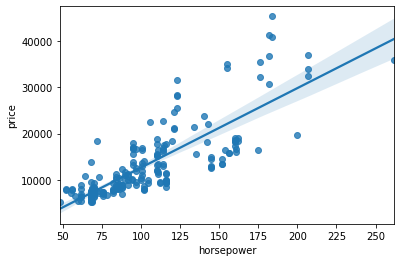

In [35]:
sns.regplot(x='horsepower',y='price',data=df)

In [36]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain,xtest, ytrain, ytest = train_test_split(df[['horsepower']],df['price'],test_size=.2, random_state=1)

In [44]:
pf= PolynomialFeatures(degree=6)
xtrain_poly =pf.fit_transform(xtrain)

In [45]:
reg = LinearRegression()
reg.fit(xtrain_poly, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
xtest_poly = pf.transform(xtest)
reg.score(xtest_poly, ytest) * 100

61.295013156273534

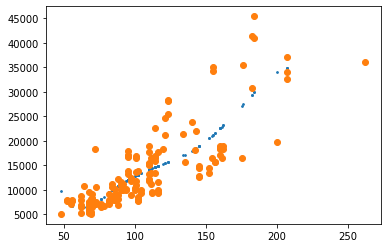

In [47]:
ypred = reg.predict(xtrain_poly)
plt.scatter(xtrain,ypred,s=3)
plt.scatter(xtrain,ytrain)
plt.show()

In [48]:
def polynomial_reg_tester(x,y,degree=2):
    pf= PolynomialFeatures(degree)
    xtrain_poly =pf.fit_transform(x)
    reg = LinearRegression()
    reg.fit(xtrain_poly, y)
    ypred = reg.predict(xtrain_poly)
    plt.title(f'degree {degree}')
    plt.scatter(x,ypred,alpha=.5)
    plt.scatter(x,y,alpha=.5)
    plt.show()

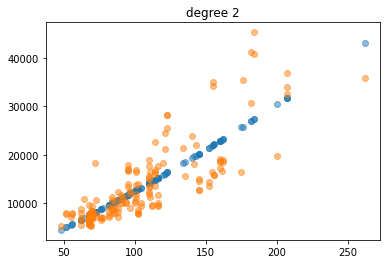

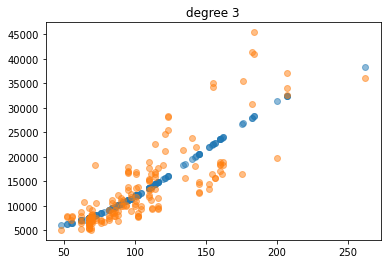

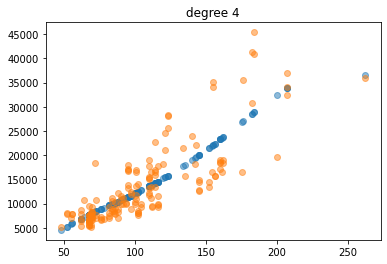

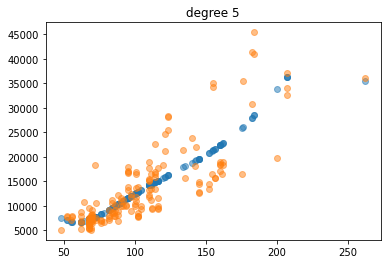

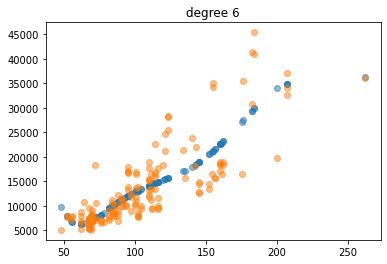

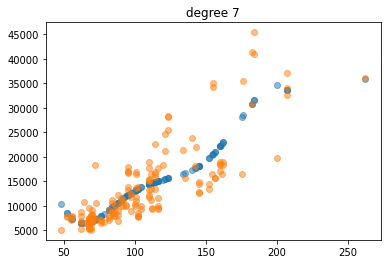

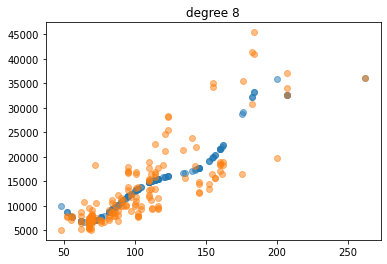

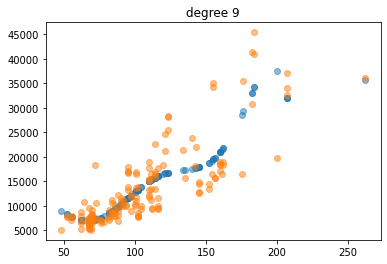

In [49]:
for i in range(2,10):
    polynomial_reg_tester(xtrain,ytrain,i)